In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [64]:
file_path = '/Users/arpit/Documents/DMT_Project/DataSet/2020/heart_2020_cleaned.csv'
data = pd.read_csv(file_path)

In [65]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [66]:
# Dropping the 'Race' column
data = data.drop('Race', axis=1)

# Displaying the first few records of the modified dataset to confirm the change
(data.head(5))

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


In [67]:
# Categorical features are those that are of type 'object'
num_categorical_features = sum(data.dtypes == 'object')

# Printing the number of categorical features
print("Number of categorical features:", num_categorical_features)

Number of categorical features: 13


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  SkinCancer        31

### Data distribution graph of all the categorical features

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


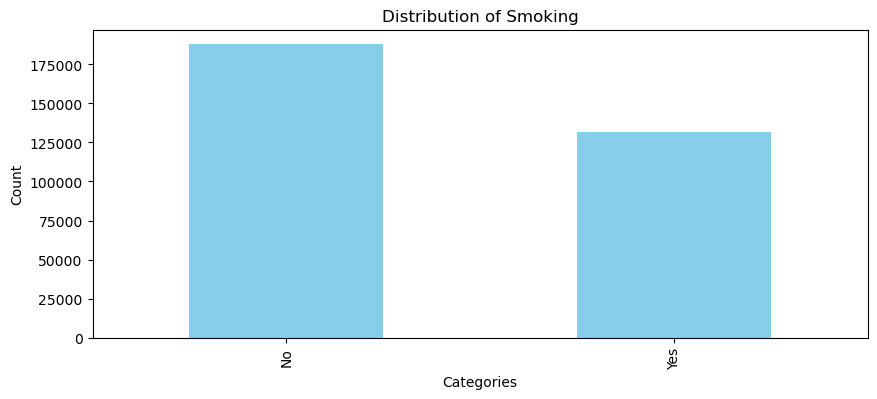

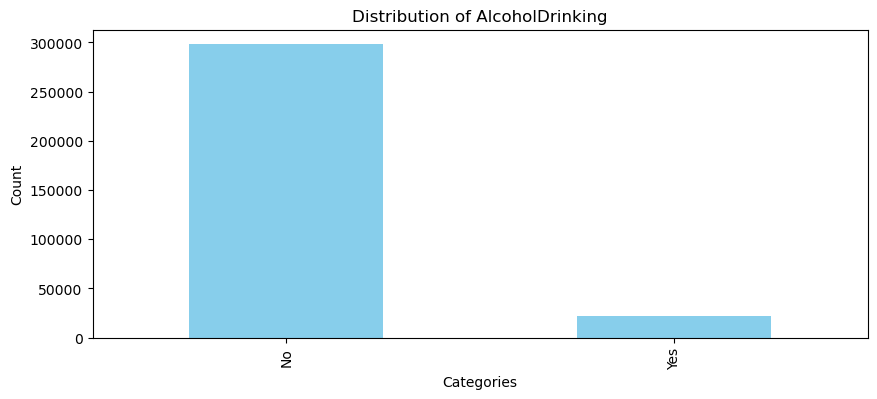

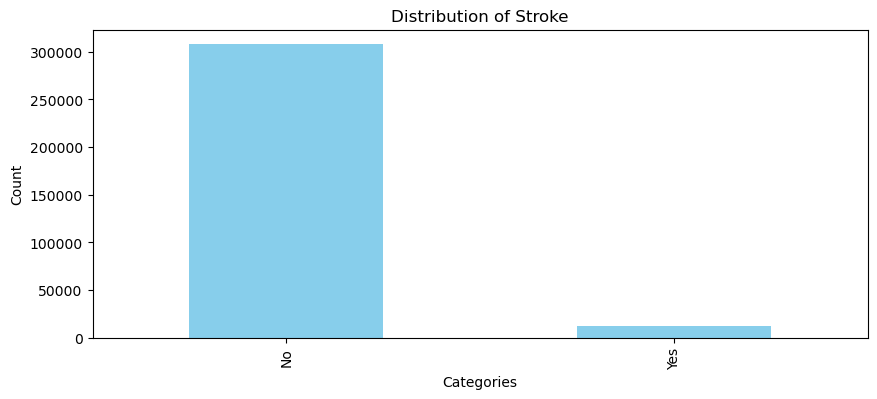

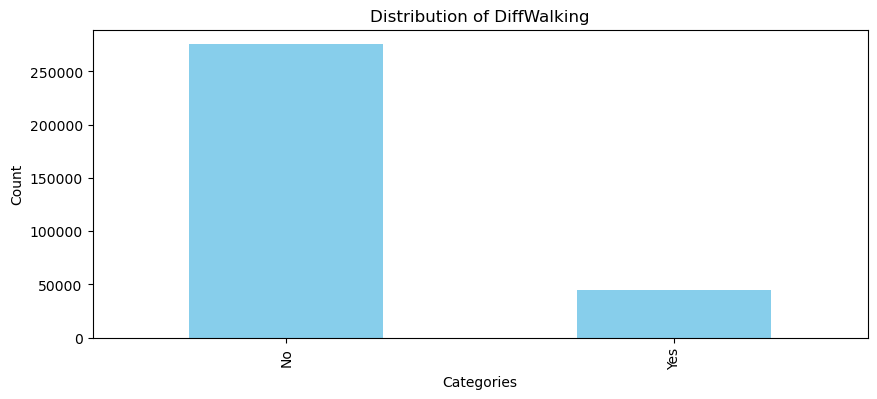

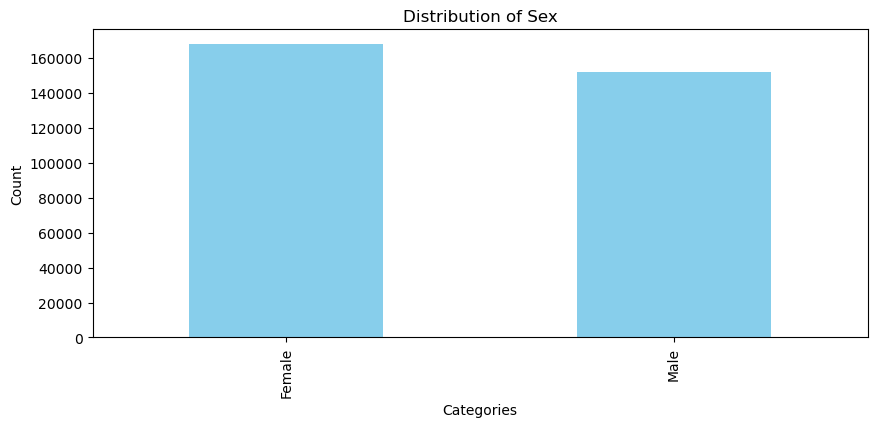

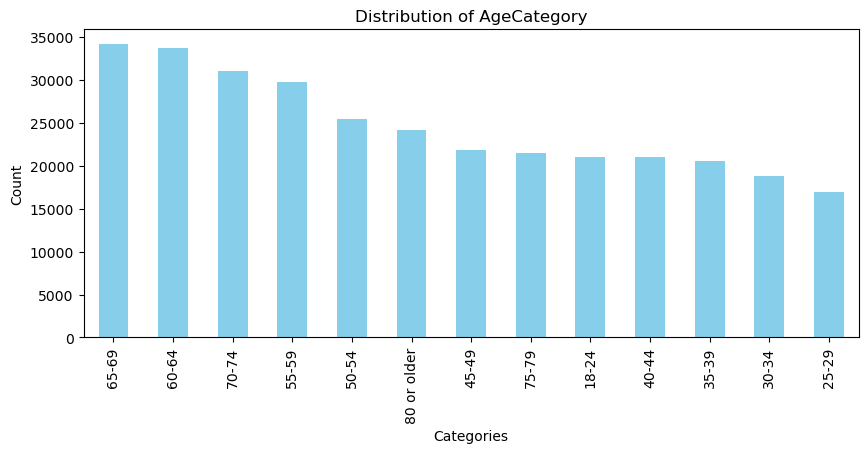

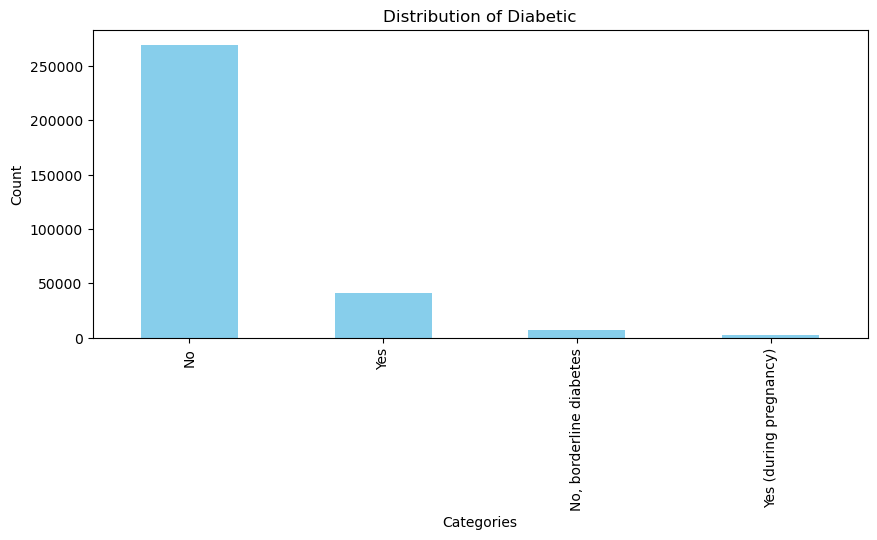

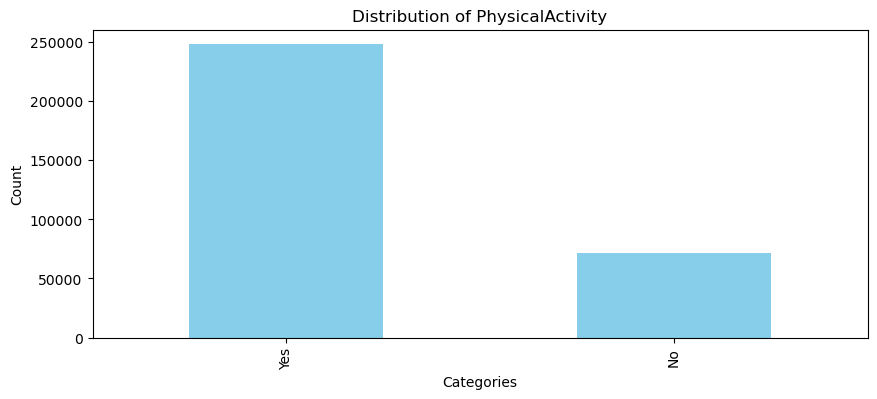

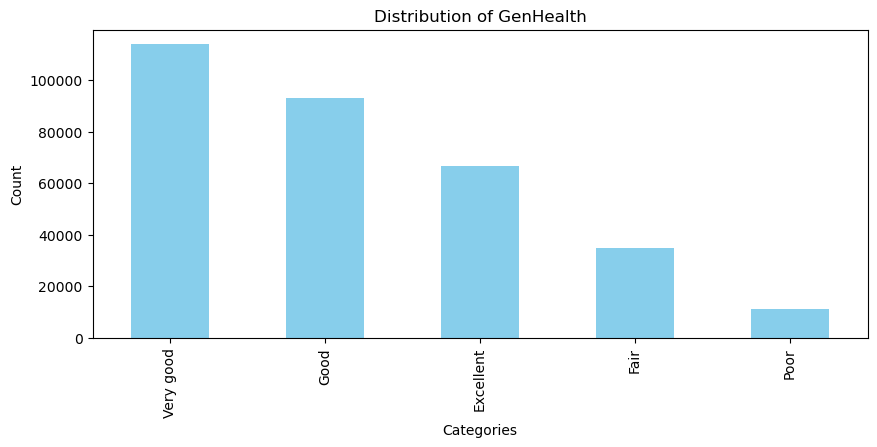

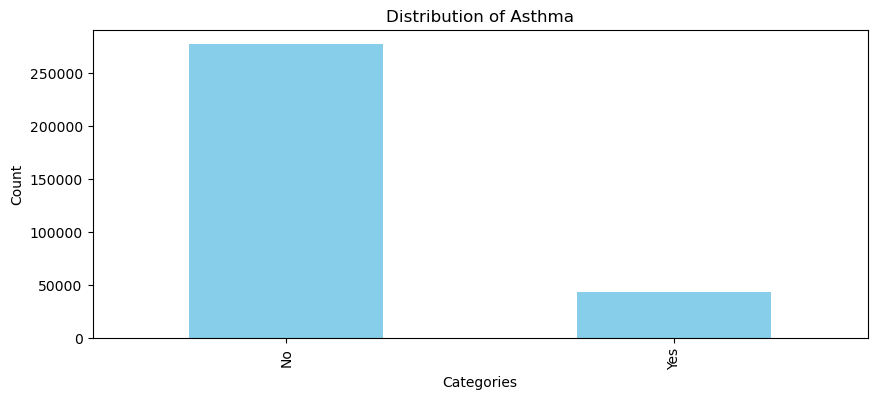

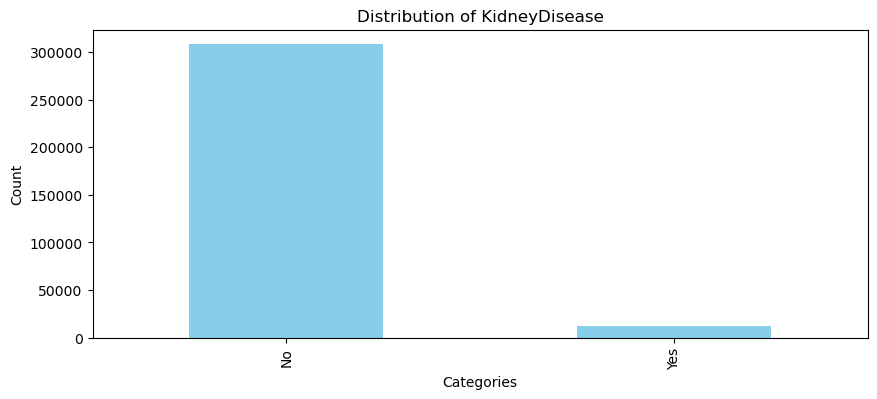

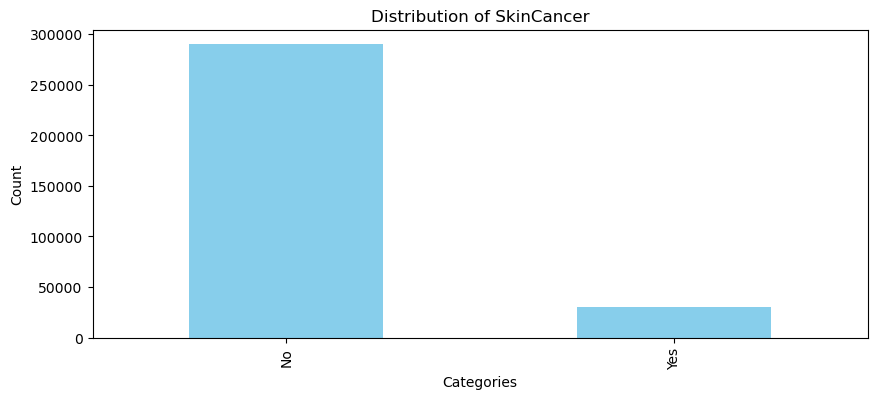

In [69]:
# Identifying original categorical features before encoding
original_categorical_features = [col for col in data.columns if data[col].dtype == 'object']
print(original_categorical_features)

# Removing 'HeartDisease' from the list of categorical features
categorical_features_without_target = [col for col in original_categorical_features if col != 'HeartDisease']

# Plotting the data distribution for each categorical feature (except 'HeartDisease')
for col in categorical_features_without_target:
    plt.figure(figsize=(10, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel('Categories')
    plt.show()

### Checking if there are any missing values

In [70]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Data Preprocessing

### As we can see above in the dataset, there are many categorical variables (Yes/No). So, first we will be doing label encoding for binary categorical variables and one-hot encoding for multi-categorical variables

In [71]:
# Identify binary and multi-category categorical variables
binary_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]
multi_cat_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding for binary categorical variables
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply One-Hot Encoding for multi-category variables
data = pd.get_dummies(data, columns=multi_cat_columns)

In [72]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_80 or older,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,False,False,False,True,False,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,True,True,False,False,False,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,False,False,False,True,False,False,True,False,False,False
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,False,True,False,False,False,False,False,False,False,True


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int64  
 1   BMI                               319795 non-null  float64
 2   Smoking                           319795 non-null  int64  
 3   AlcoholDrinking                   319795 non-null  int64  
 4   Stroke                            319795 non-null  int64  
 5   PhysicalHealth                    319795 non-null  float64
 6   MentalHealth                      319795 non-null  float64
 7   DiffWalking                       319795 non-null  int64  
 8   Sex                               319795 non-null  int64  
 9   PhysicalActivity                  319795 non-null  int64  
 10  SleepTime                         319795 non-null  float64
 11  Asthma                            319795 non-null  i

In [74]:
# Convert True/False to 1/0 for all columns
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_80 or older,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


### Plotting a bar graph for the distribution of the 'HeartDisease' target variable

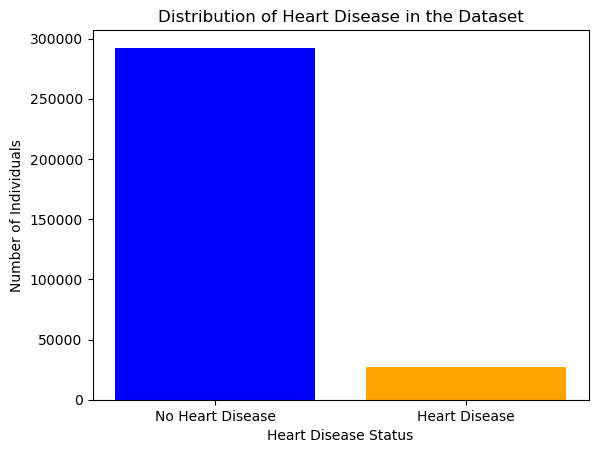

In [75]:

heart_disease_counts = data['HeartDisease'].value_counts()

plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['blue', 'orange'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Heart Disease in the Dataset')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

In [76]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_80 or older,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [77]:
# Separating features and target variable
X = data.drop('HeartDisease', axis=1)  # Features
y = data['HeartDisease']               # Target variable

### In my case, 'HeartDisease' feature is disproportionately distributed between different classes (e.g., more instances of 'No' than 'Yes' for heart disease). As the data is imbalanced, so I am using SMOTE to oversample the minority class in the training set. SMOTE is used to create synthetic samples rather than just duplicating existing ones

In [78]:
# Apply SMOTE-ENN for over-sampling and cleaning
smote_knn = SMOTE(k_neighbors = 40, random_state=42)
X_resampled, y_resampled = smote_knn.fit_resample(X, y)

### The 'BMI', 'PhysicalHealth', 'MentalHealth', and 'SleepTime' variables are numerical features and require scaling. Standardization has been applied to ensure these features contribute equally to the model's performance.

In [79]:
# Apply StandardScaler to the resampled data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

### Splitting the dataset into training set of 80% and testing set of 20%

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

### Model Training and evaluation

In [81]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.iterations):
            # Approximation of y with current weights
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        # Compute linear model prediction and apply sigmoid
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        return predictions

    def predict(self, X, threshold=0.5):
        # Convert probabilities to binary output
        probabilities = self.predict_proba(X)
        return np.array([1 if i > threshold else 0 for i in probabilities])

In [82]:
# Initialize Logistic Regression from scratch
log_reg_scratch = LogisticRegressionFromScratch(learning_rate=0.1, iterations=1000)

# Fit the model
log_reg_scratch.fit(X_train, y_train)

# Predict on the test set
y_pred_scratch = log_reg_scratch.predict(X_test)

# Predict on the train set
y_train_pred = log_reg_scratch.predict(X_train)

### Testing classification report

In [85]:
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix for binary classification.
    Returns the confusion matrix in the order: TP, FN, FP, TN.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    return TP, FN, FP, TN

def calculate_metrics(TP, FN, FP, TN):
    """
    Calculate precision, recall, and F1 score from the confusion matrix.
    """
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1_score

def classification_report_from_scratch(y_true, y_pred):
    """
    Print classification report for binary classification without using sklearn.
    """
    # Calculate confusion matrix components
    TP, FN, FP, TN = calculate_confusion_matrix(y_true, y_pred)
    
    # Calculate metrics for class 1
    precision_1, recall_1, f1_score_1 = calculate_metrics(TP, FN, FP, TN)
    
    # Calculate metrics for class 0
    precision_0, recall_0, f1_score_0 = calculate_metrics(TN, FP, FN, TP)
    
    # Print the classification report
    print(f"{'Class':<10}{'Precision':<10}{'Recall':<10}{'F1-score':<10}{'Support':<10}")
    print(f"{1:<10}{precision_1:<10.2f}{recall_1:<10.2f}{f1_score_1:<10.2f}{TP + FN:<10}")
    print(f"{0:<10}{precision_0:<10.2f}{recall_0:<10.2f}{f1_score_0:<10.2f}{TN + FP:<10}")

In [86]:
classification_report_from_scratch(y_test, y_pred_scratch)

Class     Precision Recall    F1-score  Support   
1         0.90      0.84      0.87      58484     
0         0.85      0.90      0.88      58485     


1. The model has a precision of 0.85 for the majority class (class 0) and a very high precision of 0.90 for the minority class (class 1). This means that when the model predicts heart disease (class 1), it is correct 90% of the time, which is excellent.

2. Recall: The recall for the majority class is 0.91, which is quite high, indicating the model is able to capture most of the true negatives. The recall for the minority class is 0.84, which means the model is identifying 84% of all true positive cases.

3. F1-Score: The F1-score, which is a harmonic mean of precision and recall, is 0.88 for the majority class and 0.87 for the minority class. These scores are very close, suggesting a balanced performance between precision and recall for both classes.

### Checking for any overfitting

In [87]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions against the true labels.
    """
    # Count the number of correct predictions
    correct = sum(y_true == y_pred)
    
    # Calculate the accuracy
    accuracy = correct / len(y_true)
    
    return accuracy

# Assuming y_train and y_train_pred contain the true and predicted labels for the training set
# And y_test and y_test_pred contain the true and predicted labels for the testing set
# You can replace these with your actual data variables

train_accuracy = calculate_accuracy(y_train, y_train_pred)
test_accuracy = calculate_accuracy(y_test, y_pred_scratch)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.87
Testing Accuracy: 0.87


#### As we can see above that both the training and testing accuracy are equal. So, we can say that there is no overfitting

### Plotting Confusion Matrix

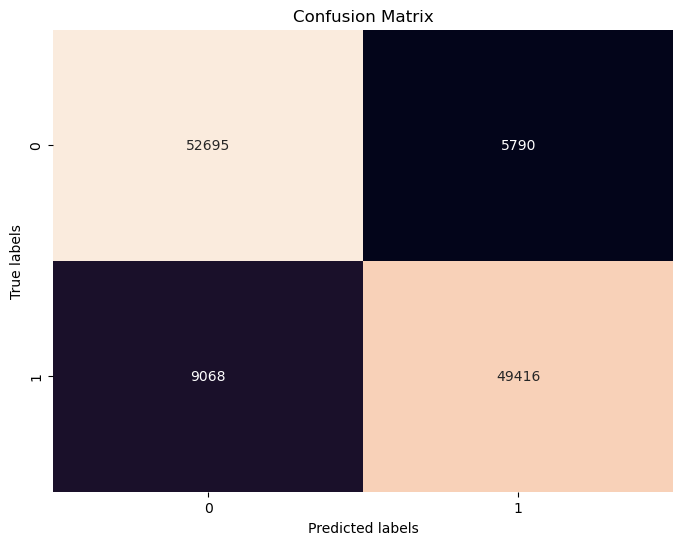

In [88]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_scratch)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model has more false positives (5318) than false negatives (9504) for the majority class, while for the minority class, the number of true positives (48980) is significantly higher than false negatives (9504), reinforcing the high recall.

### Calculation of precision, recall, f1-score and accuracy

In [89]:
def calculate_precision_recall_f1_accuracy(y_true, y_pred):
    # True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Precision calculation
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall calculation
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1-score calculation
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Accuracy calculation
    accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) > 0 else 0
    
    return precision, recall, f1_score, accuracy

In [90]:
precision, recall, f1_score, accuracy = calculate_precision_recall_f1_accuracy(y_test, y_pred_scratch)

In [91]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.90
Recall: 0.84
F1 Score: 0.87
Accuracy: 0.87


Overall Accuracy: The model has an overall accuracy of 87% on the testing set, which is quite high and suggests good generalization from the training data.

### Plotting ROC curve for predicting heart disease

In [92]:
# Get predicted probabilities for the test set
y_test_scores = log_reg_scratch.predict_proba(X_test)

In [93]:
def calculate_tpr_fpr(y_true, y_scores, thresholds):
    tpr = []
    fpr = []
    for threshold in thresholds:
        # Binary classification based on threshold
        y_pred = (y_scores >= threshold).astype(int)
        # True positives, false positives, true negatives, false negatives
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))
        # Calculate TPR and FPR
        TPR = TP / (TP + FN) if TP + FN > 0 else 0
        FPR = FP / (FP + TN) if FP + TN > 0 else 0
        tpr.append(TPR)
        fpr.append(FPR)
    return tpr, fpr

thresholds = np.linspace(0, 1, 100)

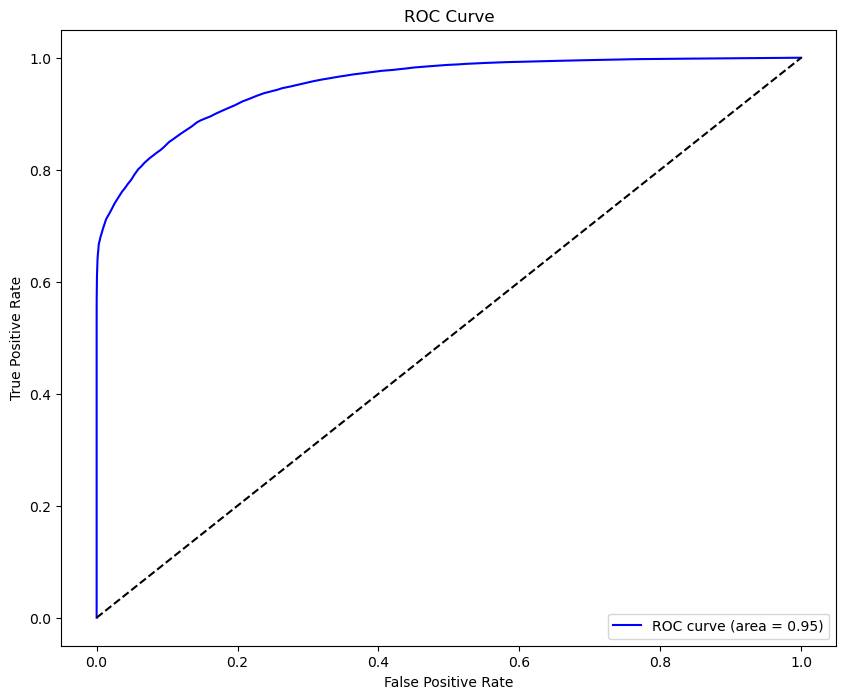

In [94]:
# Assuming y_test and y_test_scores contain the true labels and predicted scores
tpr, fpr = calculate_tpr_fpr(y_test, y_test_scores, thresholds)

# Calculate AUC using the trapezoidal rule
auc = np.trapz(tpr, fpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {-auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The AUC is 0.95, which is quite high. This means that the model has a high degree of separability, indicating that it is very capable of distinguishing between the two classes (presence and absence of heart disease).

## Evaluation metrics without using SMOTE

In [95]:
# Apply StandardScaler to the resampled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [97]:
# Initialize Logistic Regression from scratch
log_reg_scratch = LogisticRegressionFromScratch(learning_rate=0.1, iterations=1000)

# Fit the model
log_reg_scratch.fit(X_train, y_train)

# Predict on the test set
y_pred_scratch = log_reg_scratch.predict(X_test)

# Predict on the train set
y_train_pred = log_reg_scratch.predict(X_train)

### Tesing Classification Report

In [57]:
classification_report_from_scratch(y_test, y_pred_scratch)

Class     Precision Recall    F1-score  Support   
1         0.55      0.10      0.17      5592      
0         0.92      0.99      0.95      58367     


### Plotting Confusion Matrix

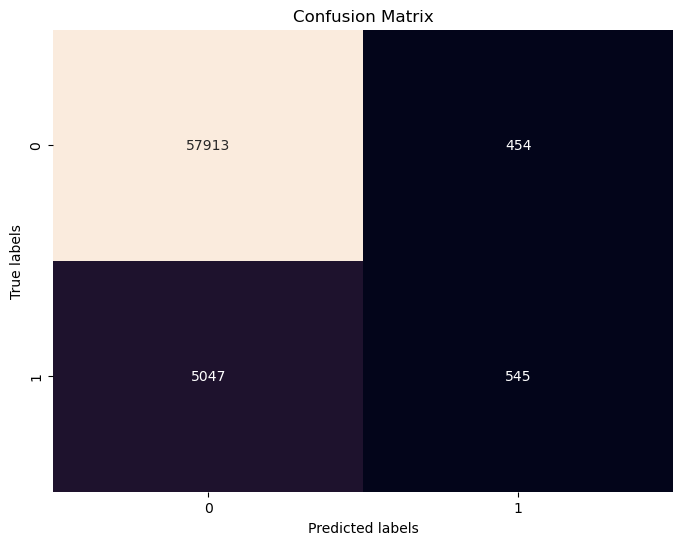

In [58]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_scratch)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Calculation of precision, recall, f1-score and accuracy

In [61]:
precision_ns, recall_ns, f1_score_ns, accuracy_ns = calculate_precision_recall_f1_accuracy(y_test, y_pred_scratch)

In [62]:
print(f'Precision: {precision_ns:.2f}')
print(f'Recall: {recall_ns:.2f}')
print(f'F1 Score: {f1_score_ns:.2f}')
print(f'Accuracy: {accuracy_ns:.2f}')

Precision: 0.55
Recall: 0.10
F1 Score: 0.17
Accuracy: 0.91


## Plotting bar graph for comparison of evaluation metrics with SMOTE and without SMOTE

In [99]:
ns_scores = [precision_ns, recall_ns, f1_score_ns, accuracy_ns]
s_scores = [precision, recall, f1_score, accuracy]

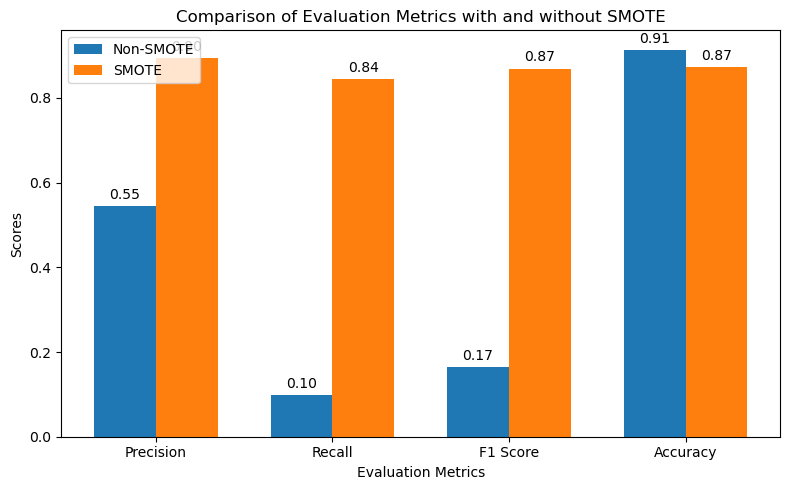

In [101]:
# Define the labels for the bars
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Define the x position of groups
x = np.arange(len(labels))

# Define bar width
bar_width = 0.35

# Create the figure and an axes
fig, ax = plt.subplots()

# Set figure size
fig.set_size_inches(8, 5)

# Plot bars for each set of scores
rects1 = ax.bar(x - bar_width/2, ns_scores, bar_width, label='Non-SMOTE')
rects2 = ax.bar(x + bar_width/2, s_scores, bar_width, label='SMOTE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics with and without SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

Based on the bar graph in the picture, which compares the evaluation metrics with and without using SMOTE (Synthetic Minority Over-sampling Technique), we can infer the following:

1. Precision: Precision is higher with SMOTE compared to without SMOTE. This indicates that when using SMOTE, the model is better at returning relevant results; that is, when it predicts the positive class, it is correct more often.

2. Recall: Recall is significantly higher with SMOTE. This suggests that after applying SMOTE, the model is better at identifying all relevant cases within the positive class. Essentially, it misses fewer positive cases.

3. F1 Score: The F1 Score, which is the harmonic mean of precision and recall, is also higher with SMOTE. This indicates a better balance between precision and recall when using SMOTE, leading to a more effective model overall for the positive class.

4. Accuracy: Accuracy appears to be the same with and without SMOTE. This could mean that the overall number of correct predictions over the total number of cases remains unchanged, regardless of the balance between the classes.